# Bearing Sizing and Evaluation

Author: Elias Aoubala

Date: 27/12/2024

In [4]:
import numpy as np
import handcalcs.render
import pandas as pd
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from rocketcea.cea_obj_w_units import CEA_Obj

# 1 - Background

This document encapsulates all the authors brief calculations on the required radial and axia loads of the bearings of the turbopump.

Everything here will be approximate for now.

## 2 - Pump Loads

### 2.1 - Axial load

For the axial load induced by the impeller, as we are using a fully open impeller design, we can perform an extremely simple calculation for the axial thrust required for the impeller.

$F = \Delta P A_{blade}  N$

where $\Delta P$ refers the pressure rise across the impelelr, A_{blade} the area of each blade in the axial direction and N the number of blades we will be using.



In [15]:
%%render sci_not

D_2 = 74.51e-3 # m

D_1 = 4.14e-3 # m

t = 5e-3 # m

delta_P = 20e5 # Pa

N = 5

A_block =  (D_2 - D_1)*t*N/2  # m**2

F_pa = delta_P * A_block




<IPython.core.display.Latex object>

### 2.2 - Radial Load

For calculating the radial load the following assumption has been used [source](https://www.ijert.org/research/radial-thrust-in-a-single-volute-centrifugal-pump-IJERTV7IS080097.pdf)

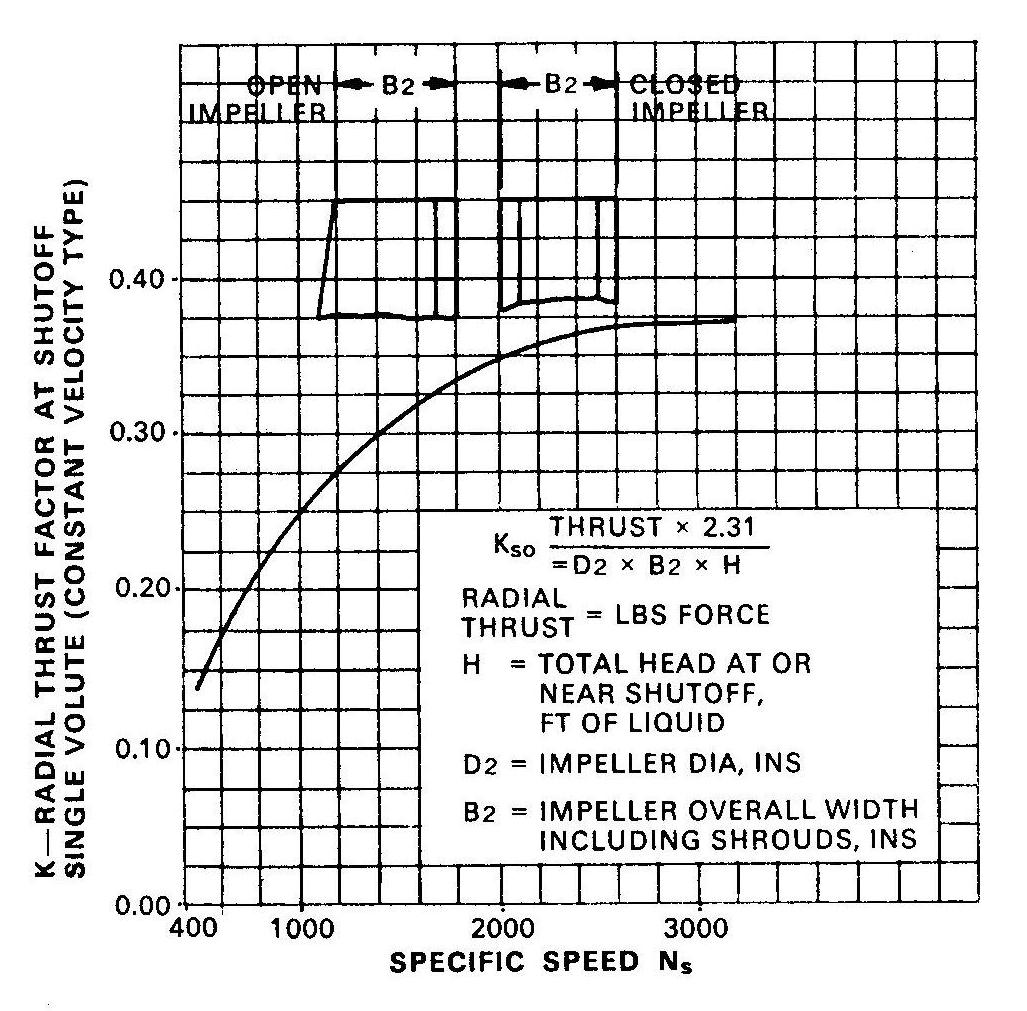

The main equation for calculating the radial thrust induced by the impeller is the following:

$F = K P D_2 B_2$

Where K is an empirical coefficient that ranges between 0.09 to 0.38, P is the pressure at the exit of the impeller, D_2 is the outerdiameter of the impeller and B_2 is the outer width of the impeller

Based on the above graph we can see that for most low specific speed pumps the radial thrust coefficient is quite low for our specific application. In this case, we can assume a value of 0.4 to be conservative.



In [14]:
%%render sci_not

K = 0.4

P = 50e5 # Pa

D_2 = 74.51e-3 # m

B_2 = 4.14e-3 # m

F_pr = K * P * D_2 * B_2 # N

<IPython.core.display.Latex object>

## 3 - Turbine Loads

### 3.1 - Axial Loads

The axial load induced on the turbines can be described simply by the pressure differential across the turbine caused by the expansion. This is dependent on the radius and size of the blisk.

We can only consider the downstream pressure of the BLISK to be conservative here, based on the nominal expansion.

In [12]:
%%render sci_not

R_t = 7

P_down = 25e5/R_t

D_t = 14e-2

F_ta = P_down * np.pi * (D_t/2)**2

<IPython.core.display.Latex object>

### 3.2 - Radial Loads

The radial load induced on the turbine can be roughly approximated as being due to the force induced on the edge of the blisk of the turbine.

This can be calculated by considering the torque produced by the impeller at the blade height, from which we can back calculate a radial load the bearing must take.

This is just an approximation at this point.

To estimate this, we can consider simply the torque produced by the turbine, then using the mean dimater, compute the radial load applied onto the shaft.

In [11]:
%%render

tau_turbine = 3.16 # Nm

D_m = 0.14

F_tr = tau_turbine / (D_m/2) 

<IPython.core.display.Latex object>

## 4 - Overall Axial and Radial Load

Based on the analysis conducted for both the turbine and the pump, the following axial and radial loads have been evaluated.

An additional margin of 20% has been taken for conservatism and account for modelling errors.

In [20]:
%%render params

F_a = (F_ta - F_pa)*1.2 # N

F_r = (F_tr + F_pr)*1.2 # N

<IPython.core.display.Latex object>

We can now use these values for the comutation of the frictional losses and bearing life for the turbopump.

## 4 - Bearing Selection and Loss Modelling.

For the bearing selection, the supplier `SKF` has been used as the main supplier, due to their wide range of available bearings and test data associated.

For the design, the selection has been limtied to angular contact ball bearings only.

Based on an initial investigation, the `7202 BEP` bearings were identified as the best fit here.

For the loss modelling, `SKF` calculator has been used. It has been assumed that the cartridge seal will have the equivalent loss of 2 additional bearings.

### 4.1 - Evaluation of Bearing Losses and Bearing Life

The following key parameters have been assumed

- LGMT 2 Lithium Lubrication is used
- Bearing Temperature is 70 C

Based on this, the following results have been acquired

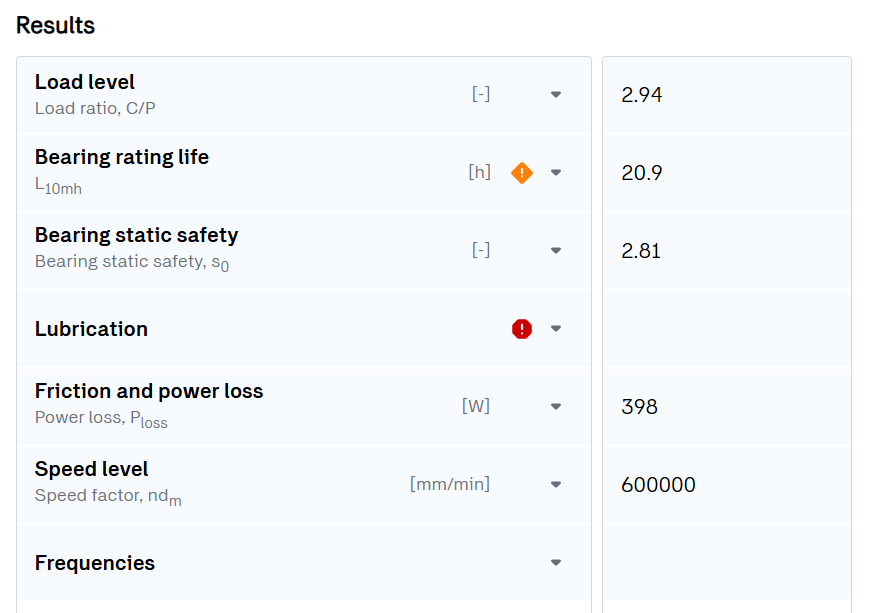

The bearing rated life was beyon the expectation use case for the turbopump (minutes at max), and thus this was considered acceptable.

Finally, the bearing power was within reasonable expectation.

## 5 - Conclusion

In conclusion, the `7202 BEP` from SKF was suitable for our application as the main bearing for use.

In addition, a list of the key information has been presented below:

| Parameter               | Value   |
| ----------------------- | ------- |
| Number of Bearings      | 2       |
| Bearing Losses          | 398 W   |
| Bearing Lifetime        | 20.9 hr |
| Total Mechanical Losses | 1.592 kW |